<a href="https://colab.research.google.com/github/sngo/learnpytorch/blob/main/01/01_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu124'

In [20]:
#Create a straight line dataset using the linear regression formula (weight * X + bias).
# Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
# Split the data into 80% training, 20% testing.
#Plot the training and testing data so it becomes visual.
start = 0
end = 1
step = 0.02
weight = 0.3
bias = 0.9
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [21]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

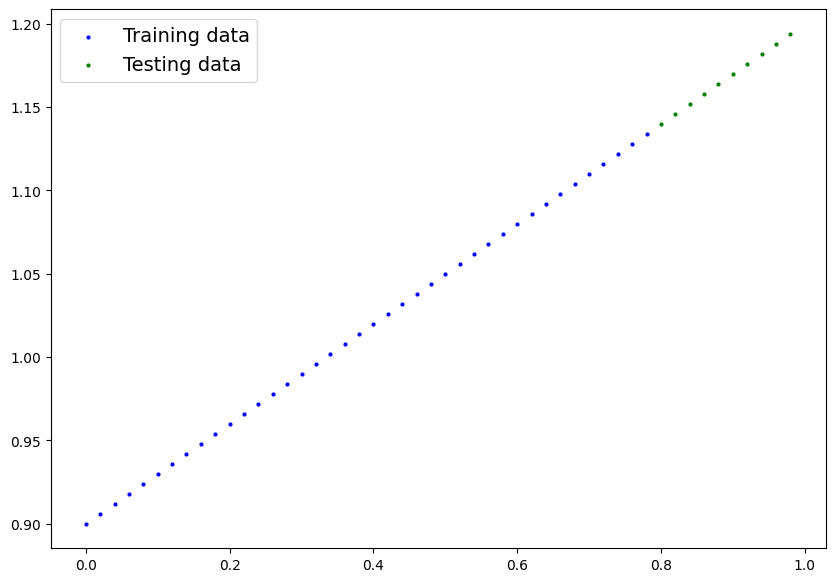

In [22]:
plot_predictions();

In [23]:
# Create a Linear Regression model class
class LinearRegressionModelV3(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [24]:
linear_model = LinearRegressionModelV3();
state = linear_model.state_dict();
state

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [25]:
# Create the loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Create the optimizer
optimizer = torch.optim.SGD(params=linear_model.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [26]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 300

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    linear_model.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = linear_model(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    linear_model.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = linear_model(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 20 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.7568813562393188 | MAE Test Loss: 0.7250651121139526 
Epoch: 20 | MAE Train Loss: 0.5264613628387451 | MAE Test Loss: 0.4556453227996826 
Epoch: 40 | MAE Train Loss: 0.2960416078567505 | MAE Test Loss: 0.18622562289237976 
Epoch: 60 | MAE Train Loss: 0.07731032371520996 | MAE Test Loss: 0.06994309276342392 
Epoch: 80 | MAE Train Loss: 0.0521300844848156 | MAE Test Loss: 0.11544597148895264 
Epoch: 100 | MAE Train Loss: 0.04509609192609787 | MAE Test Loss: 0.1043960452079773 
Epoch: 120 | MAE Train Loss: 0.038231261074543 | MAE Test Loss: 0.08853815495967865 
Epoch: 140 | MAE Train Loss: 0.03136344999074936 | MAE Test Loss: 0.07268030941486359 
Epoch: 160 | MAE Train Loss: 0.02448992058634758 | MAE Test Loss: 0.05682243034243584 
Epoch: 180 | MAE Train Loss: 0.01762397214770317 | MAE Test Loss: 0.04027769714593887 
Epoch: 200 | MAE Train Loss: 0.010759142227470875 | MAE Test Loss: 0.024419832974672318 
Epoch: 220 | MAE Train Loss: 0.003885951591655612 | MAE 

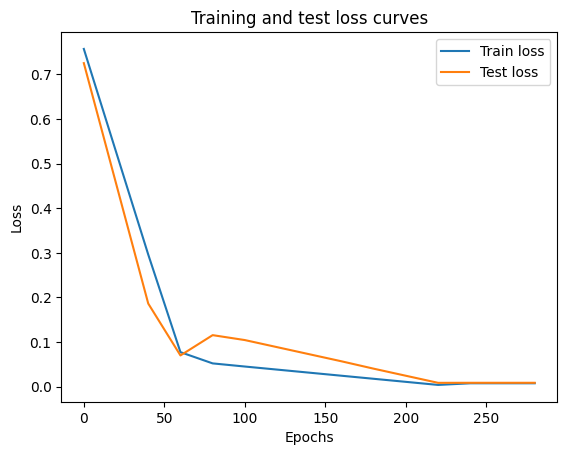

In [27]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [28]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(linear_model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.3055])), ('bias', tensor([0.8903]))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


In [29]:
# 1. Set the model in evaluation mode
linear_model.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  # 3. Make sure the calculations are done with the model and data on the same device
  # in our case, we haven't setup device-agnostic code yet so our data and model are
  # on the CPU by default.
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = linear_model(X_test)
y_preds

tensor([[1.1347],
        [1.1408],
        [1.1469],
        [1.1530],
        [1.1591],
        [1.1652],
        [1.1714],
        [1.1775],
        [1.1836],
        [1.1897]])

In [30]:
y_preds - y_test

tensor([[-0.0053],
        [-0.0052],
        [-0.0051],
        [-0.0050],
        [-0.0049],
        [-0.0048],
        [-0.0046],
        [-0.0045],
        [-0.0044],
        [-0.0043]])

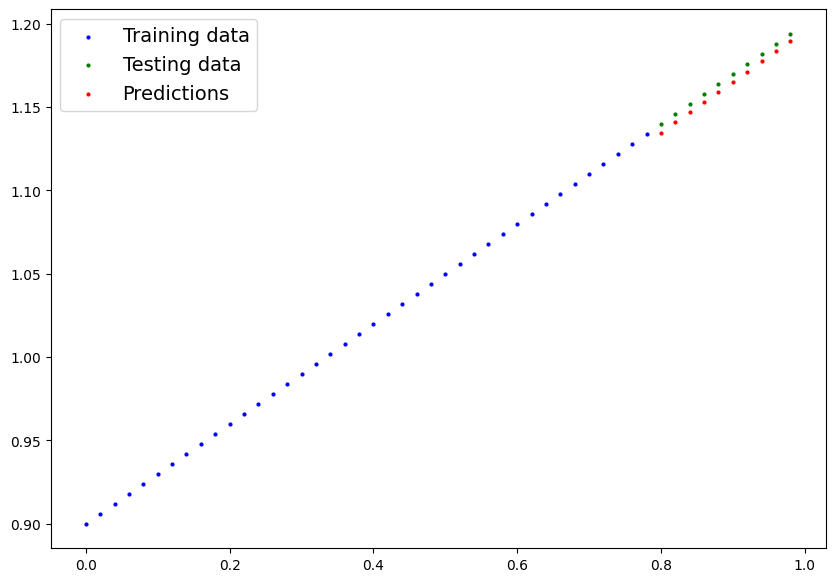

In [31]:
plot_predictions(predictions=y_preds)

In [32]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_exersice.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=linear_model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_exersice.pth


In [33]:
linear_model_1 = LinearRegressionModelV3();
linear_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH));


<ipython-input-33-bdab47747169>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  linear_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH));


In [35]:
linear_model_1.eval()

# 2. Setup the inference mode context manager
with torch.inference_mode():
  y_preds_load = linear_model_1(X_test)
y_preds_load

tensor([[1.1347],
        [1.1408],
        [1.1469],
        [1.1530],
        [1.1591],
        [1.1652],
        [1.1714],
        [1.1775],
        [1.1836],
        [1.1897]])

In [37]:
y_preds_load == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])